In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings

warnings.filterwarnings("ignore")

In [143]:
row_data_df = pd.read_csv(
    "ranks_per_year.csv",
    names=[
        "date",
        "sum_gflops",
        "sum_meta",
        "top_1_gflops",
        "top1_meta",
        "top_500_gflops",
        "top500_meta",
    ],
    parse_dates=["date"],
)
row_data_df.tail(5)

,date,sum_gflops,sum_meta,top_1_gflops,top1_meta,top_500_gflops,top500_meta
52,2019-05-01,1.559575e+09,06/2019: Sum = 1.6 EFlop/s,148600000.0,06/2019: #1 = 148.6 PFlop/s,1021000.0,06/2019: #500 = 1.0 PFlop/s]
53,2019-10-01,1.646887e+09,11/2019: Sum = 1.6 EFlop/s,148600000.0,11/2019: #1 = 148.6 PFlop/s,1142000.0,11/2019: #500 = 1.1 PFlop/s]
54,2020-05-01,2.206134e+09,06/2020: Sum = 2.2 EFlop/s,415530000.0,06/2020: #1 = 415.5 PFlop/s,1228000.0,06/2020: #500 = 1.2 PFlop/s]
55,2020-10-01,2.428762e+09,11/2020: Sum = 2.4 EFlop/s,442010000.0,11/2020: #1 = 442.0 PFlop/s,1316840.0,11/2020: #500 = 1.3 PFlop/s]
56,2021-05-01,2.786059e+09,06/2021: Sum = 2.8 EFlop/s,442010000.0,06/2021: #1 = 442.0 PFlop/s,1511000.0,06/2021: #500 = 1.5 PFlop/s]


In [21]:
data_df = row_data_df[["date", "top_1_gflops", "top_500_gflops"]]
data_df.head(5)

,date,top_1_gflops,top_500_gflops
0,1993-05-01,59.7,0.42
1,1993-10-01,124.0,0.47
2,1994-05-01,143.4,0.84
3,1994-10-01,170.0,1.16
4,1995-05-01,170.0,1.96


### Perfomance

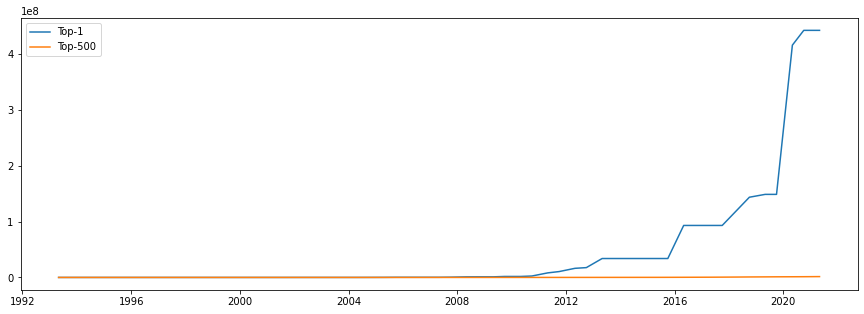

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(data_df.date, data_df.top_1_gflops, label='Top-1')
plt.plot(data_df.date, data_df.top_500_gflops, label='Top-500')
plt.legend();

### Log scala perfomance

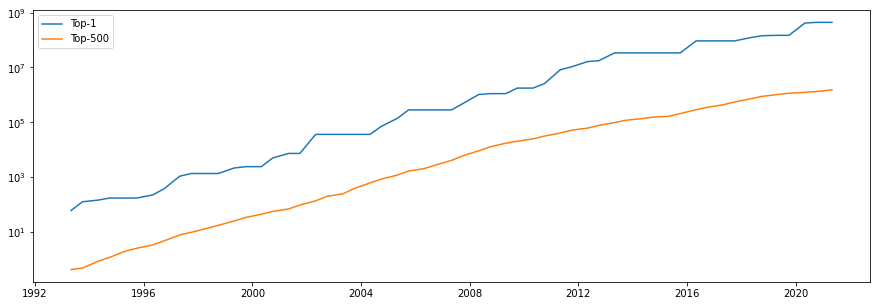

In [39]:
plt.figure(figsize=(15, 5))
plt.yscale("log")
plt.plot(data_df.date, data_df.top_1_gflops, label='Top-1')
plt.plot(data_df.date, data_df.top_500_gflops, label='Top-500')
plt.legend();

### Train model

In [128]:
data_df['log_top_1'] = np.log10(data_df['top_1_gflops'])

In [129]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression(),
)

In [130]:
X = np.arange(data_df['top_1_gflops'].shape[0])

In [131]:
polynomial_regression.fit(
    X.reshape(-1, 1),
    data_df.log_top_1.to_numpy(),
)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [145]:
X_predict = np.arange(X.shape[0] + 9).reshape(-1, 1)
y_predict = 10**polynomial_regression.predict(X_predict)

In [136]:
date_future = pd.to_datetime(
    [
        "2021-10-01",
        "2022-05-01",
        "2022-10-01",
        "2023-05-01",
        "2023-10-01",
        "2024-05-01",
        "2024-10-01",
        "2025-05-01",
        "2025-10-01",
    ]
)

In [140]:
date_with_future  = np.concatenate([data_df.date, date_future])

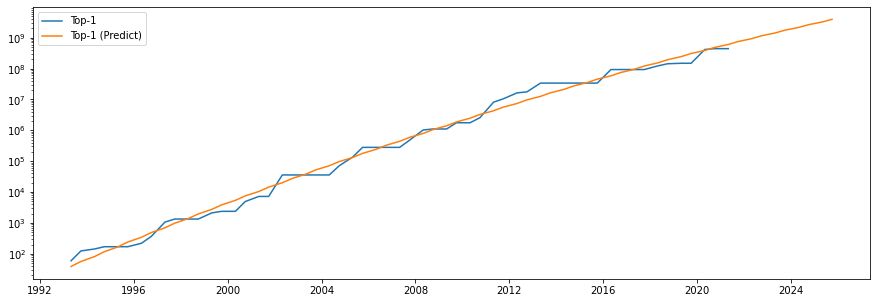

In [141]:
plt.figure(figsize=(15, 5))
plt.yscale("log")
plt.plot(data_df.date, data_df.top_1_gflops, label='Top-1')
plt.plot(date_with_future, y_predict, label='Top-1 (Predict)')
plt.legend();

In [150]:
y_predict[-2], date_with_future[-2], y_predict[-1], date_with_future[-1],

(3225672922.104593,
 numpy.datetime64('2025-05-01T00:00:00.000000000'),
 3929607393.5865917,
 numpy.datetime64('2025-10-01T00:00:00.000000000'))

```
Prediction [2025-05-01] perfomance for Top-1 is: 3.2 EFlop/s
Prediction [2025-10-01] perfomance for Top-1 is: 3.9 EFlop/s 
```